In [38]:
# Load dataset "compilado_delitos_2022.xlsx" with pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

# Read the data, all strings
df_copy = pd.read_excel('compilado_delitos_2022.xlsx', dtype=str)

In [39]:
df = df_copy.copy()
#Print dimensions of the dataset
print(df.shape)# Print columns of the dataset
print(df.columns)
# Print the first 5 rows of the data
df.head()

(349804, 42)
Index(['folio', 'origen_incidente', 'fecha_creacion', 'hora_creacion',
       'dia_semana', 'fecha_cierre', 'hora_cierre', 'usuario_inicia',
       'existe_video', 'numero_llamante', 'nombre_llamante',
       'numero_alternativo', 'incidente_c4', 'tipo_intervencion_c2', 'calle',
       'numero', 'esquina', 'colonia', 'codigo_postal', 'delegacion_inicio',
       'sector_inicio', 'c2_inicio', 'latitud', 'longitud', 'senias',
       'codigo_cierre', 'comentarios', 'detenidos', 'tiempo_resp_fce',
       'clas_con_f_alarma', 'tipo_entrada', 'delegacion_cierre',
       'sector_cierre', 'c2_cierre', 'usuario_cierre', 'usuario_intervencion',
       'folio_padre', 't_aten_066', 't_desp_c2_c4', 't_unidad', 't_total',
       'inc-clas'],
      dtype='object')


folio origen_incidente fecha_creacion        hora_creacion  \
0  C5/20220402/02038  LLAMADA DEL 911     2022-04-02  1899-12-31 07:52:10   
1  C5/20220414/03517  LLAMADA DEL 911     2022-04-14  1899-12-31 19:55:24   
2  C5/20220407/04287  LLAMADA DEL 911     2022-04-07  1899-12-31 22:10:55   
3  C5/20220407/04172  LLAMADA DEL 911     2022-04-07  1899-12-31 21:41:51   
4  C5/20220408/01398  LLAMADA DEL 911     2022-04-08  1899-12-31 11:02:29   

  dia_semana fecha_cierre          hora_cierre usuario_inicia existe_video  \
0     Sábado   2022-04-02  1899-12-31 12:35:40      C51098712          NaN   
1     Jueves   2022-04-14  1899-12-31 23:00:08      C51052088          NaN   
2     Jueves   2022-04-08  1899-12-31 02:39:15      C51098777          NaN   
3     Jueves   2022-04-08  1899-12-31 05:19:40       C5917313          NaN   
4    Viernes   2022-04-08  1899-12-31 13:55:42      C51098787          NaN   

  numero_llamante  ...        sector_cierre c2_cierre usuario_cierre  \
0      5577358197  ...            CUAUTEPEC  C2 Norte       CN827335   
1      5561576497  ...              TEPEPAN       C4i     JOBSISTEMA   
2      4494557234  ...               ARAGON  C2 Norte       CN834171   
3      5591224649  ...              TEZONCO       C4i     JOBSISTEMA   
4      5514788326  ...  HUIPULCO-HOSPITALES    C2 Sur       CS828374   

  usuario_intervencion        folio_padre t_aten_066           t_desp_c2_c4  \
0             CN827335                  -        NaN  2.4305555555555552E-4   
1             CO940570                  -        NaN  4.1666666666666669E-4   
2             CN834171                  -        NaN  3.0092592592592595E-4   
3            CO1127834  C5/20220407/04188        NaN  9.3750000000000007E-4   
4             CS828374                  -        NaN  2.1064814814814813E-3   

                t_unidad                t_total  \
0  2.1412037037037038E-3  3.0439814814814821E-3   
1  1.7708333333333332E-3  2.5925925925925925E-3   
2                  -:-:-                  -:-:-   
3  3.5069444444444445E-3  5.6134259259259271E-3   
4  4.0509259259259258E-4  3.5185185185185185E-3   

                                            inc-clas  
0  Robo-Vehículo sin Violencia-DELITO DE ALTO IMP...  
1               Denuncia-Persona Sospechosa-SERVICIO  
2  Robo-Vehiculo con Violencia-DELITO DE ALTO IMP...  
3  Robo-Vehiculo con Violencia-DELITO DE ALTO IMP...  
4  Robo-Vehículo sin Violencia-DELITO DE ALTO IMP...  

[5 rows x 42 columns]

In [41]:
''' Save columns and drop the ones that are not needed
       ['fecha_creacion', 'hora_creacion',
       'dia_semana', 'incidente_c4', 'colonia', 'delegacion_inicio',
       'sector_inicio', 'latitud', 'longitud']
'''

# Remove YYYY-MM-DD in field hora_creacion
df['hora_creacion'] = df['hora_creacion'].str[11:13]
# Remove rows with date 2021-12-31
df = df[df.fecha_creacion != '2021-12-31']
df = df[df.fecha_creacion != '2023-01-01']
# Remove YYYY of field fecha_creacion
df['fecha_creacion'] = df['fecha_creacion'].str[5:]
# Map dia_semana from name to int-name
df['dia_semana'] = df['dia_semana'].replace({'Lunes':'1-Lunes', 'Martes':'2-Martes', 'Miércoles':'3-Miércoles', 'Jueves':'4-Jueves', 'Viernes':'5-Viernes', 'Sábado':'6-Sábado', 'Domingo':'7-Domingo'})
# Map mes_creacion from name to int-name
df['mes_creacion'] = df['fecha_creacion'].str[:2].replace({'01':'01-Enero', '02':'02-Febrero', '03':'03-Marzo', '04':'04-Abril', '05':'05-Mayo', '06':'06-Junio', '07':'07-Julio', '08':'08-Agosto', '09':'09-Septiembre', '10':'10-Octubre', '11':'11-Noviembre', '12':'12-Diciembre'})
# Map dia-mes_creacion from name to int
df['dia_creacion'] = df['fecha_creacion'].str[3:]
# Get de week number of the year
df['semana_creacion'] = pd.to_datetime(df['fecha_creacion'], format='%m-%d').dt.week


columns = ['fecha_creacion', 'hora_creacion', 'mes_creacion', 'dia_creacion', 'semana_creacion',
        'dia_semana', 'incidente_c4', 'colonia', 'delegacion_inicio',
        'sector_inicio', 'latitud', 'longitud']

df = df[columns]



# Print the first 5 rows of the data
df.head()

/tmp/ipykernel_18826/4193014052.py:21: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df['semana_creacion'] = pd.to_datetime(df['fecha_creacion'], format='%m-%d').dt.week


fecha_creacion hora_creacion mes_creacion dia_creacion  semana_creacion  \
0          04-02            07     04-Abril           02               14   
1          04-14            19     04-Abril           14               15   
2          04-07            22     04-Abril           07               14   
3          04-07            21     04-Abril           07               14   
4          04-08            11     04-Abril           08               14   

  dia_semana                 incidente_c4                        colonia  \
0   6-Sábado  Robo-Vehículo sin Violencia                   ZONA ESCOLAR   
1   4-Jueves  Denuncia-Persona Sospechosa        SANTA CECILIA TEPETLAPA   
2   4-Jueves  Robo-Vehiculo con Violencia  SAN JUAN DE ARAGON VI SECCION   
3   4-Jueves  Robo-Vehiculo con Violencia                      LA PLANTA   
4  5-Viernes  Robo-Vehículo sin Violencia     EJIDOS DE SAN PEDRO MARTIR   

   delegacion_inicio        sector_inicio    latitud     longitud  
0  GUSTAVO A. MADERO            CUAUTEPEC  19.540726  -99.1446619  
1         XOCHIMILCO              TEPEPAN  19.220329   -99.095439  
2  GUSTAVO A. MADERO               ARAGON  19.466062   -99.064584  
3         IZTAPALAPA              TEZONCO  19.294715   -99.065944  
4            TLALPAN  HUIPULCO-HOSPITALES  19.264921   -99.162166

In [40]:
# Separar los datos por delitos
df_delitos = df.groupby('incidente_c4')
df_delitos.head()

folio  origen_incidente fecha_creacion        hora_creacion  \
0     C5/20220402/02038   LLAMADA DEL 911     2022-04-02  1899-12-31 07:52:10   
1     C5/20220414/03517   LLAMADA DEL 911     2022-04-14  1899-12-31 19:55:24   
2     C5/20220407/04287   LLAMADA DEL 911     2022-04-07  1899-12-31 22:10:55   
3     C5/20220407/04172   LLAMADA DEL 911     2022-04-07  1899-12-31 21:41:51   
4     C5/20220408/01398   LLAMADA DEL 911     2022-04-08  1899-12-31 11:02:29   
5     C5/20220415/04469   LLAMADA DEL 911     2022-04-15  1899-12-31 21:19:05   
6     C5/20220415/04461   LLAMADA DEL 911     2022-04-15  1899-12-31 21:17:55   
7    C2N/20220427/00107  BOTÓN DE AUXILIO     2022-04-27  1899-12-31 16:55:41   
8    C2P/20220427/00064  BOTÓN DE AUXILIO     2022-04-27  1899-12-31 12:54:16   
9    C2P/20220427/00037  BOTÓN DE AUXILIO     2022-04-27  1899-12-31 08:44:44   
10    C5/20220401/01779   LLAMADA DEL 911     2022-04-01  1899-12-31 11:42:02   
456   C5/20220405/00887   LLAMADA DEL 911     2022-04-05  1899-12-31 08:36:31   
457   C5/20220405/00071   LLAMADA DEL 911     2022-04-05  1899-12-31 00:22:19   
458   C5/20220405/00936   LLAMADA DEL 911     2022-04-05  1899-12-31 08:57:00   
459   C5/20220405/00994   LLAMADA DEL 911     2022-04-05  1899-12-31 09:16:56   
670   C5/20220405/00532             RADIO     2022-04-05  1899-12-31 05:01:50   
671   C5/20220405/00707             RADIO     2022-04-05  1899-12-31 07:18:21   
672   C5/20220405/00627             RADIO     2022-04-05  1899-12-31 06:23:24   
673   C5/20220405/00614             RADIO     2022-04-05  1899-12-31 06:13:38   
674   C5/20220405/00634   LLAMADA DEL 911     2022-04-05  1899-12-31 06:22:29   
687   C5/20220404/04217   LLAMADA DEL 911     2022-04-04  1899-12-31 20:43:04   
688   C5/20220404/04470   LLAMADA DEL 911     2022-04-04  1899-12-31 21:32:32   
689   C5/20220404/04439   LLAMADA DEL 911     2022-04-04  1899-12-31 21:26:48   
690   C5/20220404/04467   LLAMADA DEL 911     2022-04-04  1899-12-31 21:31:17   
691   C5/20220404/04460   LLAMADA DEL 911     2022-04-04  1899-12-31 21:30:06   
719   C5/20220405/01543   LLAMADA DEL 911     2022-04-05  1899-12-31 12:05:27   
720   C5/20220405/01150   LLAMADA DEL 911     2022-04-05  1899-12-31 10:04:59   
721   C5/20220405/00907   LLAMADA DEL 911     2022-04-05  1899-12-31 08:42:37   
722  C2N/20220404/00170  BOTÓN DE AUXILIO     2022-04-04  1899-12-31 23:18:26   
723  C2N/20220405/00002  BOTÓN DE AUXILIO     2022-04-05  1899-12-31 00:23:38   
750   C5/20220404/04518   LLAMADA DEL 911     2022-04-04  1899-12-31 21:40:53   
751   C5/20220405/00904   LLAMADA DEL 911     2022-04-05  1899-12-31 08:42:02   
752   C5/20220405/00888   LLAMADA DEL 911     2022-04-05  1899-12-31 08:35:19   
753   C5/20220405/00880   LLAMADA DEL 911     2022-04-05  1899-12-31 08:34:46   
754   C5/20220405/00872   LLAMADA DEL 911     2022-04-05  1899-12-31 08:30:20   
765   C5/20220404/04746   LLAMADA DEL 911     2022-04-04  1899-12-31 22:36:41   
766  C2O/20220405/00204  BOTÓN DE AUXILIO     2022-04-05  1899-12-31 18:37:42   
767   C5/20220405/02584   LLAMADA DEL 911     2022-04-05  1899-12-31 16:03:52   
768   C5/20220405/02487   LLAMADA DEL 911     2022-04-05  1899-12-31 15:43:47   
769   C5/20220404/03734   LLAMADA DEL 911     2022-04-04  1899-12-31 19:01:50   
770   C5/20220405/02530   LLAMADA DEL 911     2022-04-05  1899-12-31 15:53:12   
773   C5/20220404/04453   LLAMADA DEL 911     2022-04-04  1899-12-31 21:28:32   
774   C5/20220404/04362   LLAMADA DEL 911     2022-04-04  1899-12-31 21:08:06   
775   C5/20220404/04350   LLAMADA DEL 911     2022-04-04  1899-12-31 21:05:40   
776   C5/20220404/04098   LLAMADA DEL 911     2022-04-04  1899-12-31 20:18:13   
800  C2P/20220404/00184  BOTÓN DE AUXILIO     2022-04-04  1899-12-31 21:45:27   
801  C2P/20220405/00019             RADIO     2022-04-05  1899-12-31 08:17:34   
802  C2P/20220405/00012            CAMARA     2022-04-05  1899-12-31 03:30:39   
803  C2P/20220405/00137             RADIO     202

In [36]:
# 'Estadisticas trimestrales' en ingles: 'Trimestral statistics'
def statistic_frequency(df_main:pd.DataFrame, conditionals:list[pd.Series], groupby:str, titles:list[str], dir:str, num_high:int=5, num_low:int=5):
	from matplotlib.backends.backend_pdf import PdfPages
	import os

	if not os.path.exists(dir):
		os.makedirs(dir)

	with PdfPages(dir + '/'+ dir +'.pdf') as pdf:
		df_main_by_delitos = df_main.groupby('incidente_c4')
		for delito, delito_df in df_main_by_delitos:
			fig, axes = plt.subplots(nrows=1, ncols=len(conditionals), figsize=(5*len(conditionals), 5))
			# check if axes is a list or a single axis
			if not isinstance(axes, np.ndarray):
				axes = [axes]

			df_delito_pts = [delito_df[conditional] for conditional in conditionals]
			
			
			for df_section,title,axe in zip(df_delito_pts, titles, axes):
				delito_df_pt = df_section.groupby(groupby).count()['incidente_c4']
		
				delito_df_pt.plot(ax=axe)
				axe.set_title(title)
				axe.set_xticklabels(axe.get_xticklabels(), rotation=90)

				# Add scatter points with text labels to 5th hights days
				delito_df_pt1_sorted = delito_df_pt.sort_values(ascending=False)
				for i, (x, y) in enumerate(zip(delito_df_pt1_sorted.index, delito_df_pt1_sorted.values)):
					if i < num_low or i+num_high >= len(delito_df_pt1_sorted):
						x_pos = delito_df_pt.index.get_loc(x)
						axe.scatter(x_pos, y, s=10, color='black')
						axe.text(x_pos, y, str(f"{x} [{y}]"), fontsize=8, color='red' if i<num_low else 'green', rotation=90,  horizontalalignment='right', verticalalignment='top')

			#Get Max scale of all axes using get_ylim()
			y_max = max([ax.get_ylim()[1] for ax in axes])
			#Set all axes to the same scale
			for ax in axes:
				ax.set_ylim(0, y_max)


			plt.suptitle(delito)
			plt.savefig(f"{dir}/{delito}.png")
			pdf.savefig()
			plt.show()
		plt.close()

def statistic_heatmap(df_main:pd.DataFrame, index, columns, title, dir:str):
    import os
    import seaborn as sns
    import matplotlib.pyplot as plt
    from matplotlib.backends.backend_pdf import PdfPages

    if not os.path.exists(dir):
        os.makedirs(dir)


    with PdfPages(f'{dir}/{dir}.pdf') as pdf:
        df_main_by_delitos = df_main.groupby('incidente_c4')
        for delito, delito_df in df_main_by_delitos:
            # Create a pivot table with the count of incidents by day and hour
            delito_df_pt = delito_df.pivot_table(index=index, columns=columns, values='incidente_c4', aggfunc='count', fill_value=0)
            # Plot the heatmap
            fig, ax = plt.subplots()
            sns.heatmap(delito_df_pt, cmap='YlGnBu', ax=ax)
            ax.set_title(title)
            plt.suptitle(delito)
            pdf.savefig()
            plt.savefig(f"{dir}/{delito}.png")
            plt.show()
        plt.close()

def statistic_geomap(df_main:pd.DataFrame, groupby:str, title:str, dir:str, USE_SECTORS:bool=True):
    import os
    import geopandas as gpd
    from shapely.geometry import Point
    from matplotlib.backends.backend_pdf import PdfPages
    import matplotlib.pyplot as plt
    import seaborn as sns

    if not os.path.exists(dir):
        os.makedirs(dir)

    if USE_SECTORS:
        mxcity = gpd.read_file('mapa_mexico_sectores/')\
            .set_index('TERRITORIA')\
            .to_crs(epsg=4326)
    else:
        # Obtain the map of Mexico
        mx = gpd.read_file('mapa_mexico/')\
                .set_index('CLAVE')\
                .to_crs(epsg=4326)
        # obtain the map of Mexico City with the geometry of the city
        mxcity = mx.query('CVE_EDO==\"09\"')

    # leer archivo csv camaras_sectoractual.csv
    df_cameras = pd.read_csv('CAMARAS_SECTORACTUAL.csv', sep=',')
    # ob
    df_cameras = df_cameras[['CYGW', 'CXGW']]
    df_cameras = df_cameras.dropna()

    # Coordinate reference system : WGS84
    crs = {'init': 'epsg:4326'}


    with PdfPages(f'{dir}/{dir}.pdf') as pdf:
        df_main_by_delitos = df_main.groupby('incidente_c4')
        for delito, delito_df in df_main_by_delitos:
            fig, ax = plt.subplots(figsize=(10, 10))

            mxcity.boundary.plot(ax=ax, color='black', linewidth=1.5)
            #mxcity.plot(ax=ax, color='white', edgecolor='black')

            # Create a GeoDataFrame from the DataFrame
            gdf = gpd.GeoDataFrame(
                delito_df, 
                crs=crs,
                geometry=gpd.points_from_xy(delito_df.longitud, delito_df.latitud)
            )

            # Plot the incidents
            gdf.plot(ax=ax, markersize=2, color='#26A337', alpha=0.075)

            # Plot the cameras
            gdf_cameras = gpd.GeoDataFrame(
                df_cameras,
                crs=crs,
                geometry=gpd.points_from_xy(df_cameras.CXGW, df_cameras.CYGW)
            )
            gdf_cameras.plot(ax=ax, markersize=2, color='#FF0000', alpha=0.1)

            # Add a title
            ax.set_title(title)
            plt.suptitle(delito)
            pdf.savefig()
            plt.savefig(f"{dir}/{delito}.png")
            plt.show()
        plt.close()

In [ ]:
# Tendencia por hora del dia
statistic_frequency(
	df,
	[df['hora_creacion']>''],
	'hora_creacion',
	['Enero - Diciembre 2022'],
    'tendencia_diaria',
    2,2
)

In [ ]:
# Tendencia por dia de la semana
statistic_frequency(
	df,
	[df['incidente_c4']>''],
	'dia_semana',
	['Enero - Diciembre 2022'],
    'tendencia_semanal',
    2,2
)

In [ ]:
# Tendencia por dia del mes
statistic_frequency(
	df,
	[df['incidente_c4']>''],
	'dia_creacion',
	['Enero - Diciembre 2022'],
    'tendencia_semanal',
    2,2
)

In [ ]:
# Tendencia por mes del año
statistic_frequency(
	df,
	[
		df['fecha_creacion'] < '04-01',
		((df['fecha_creacion'] >= '04-01') & (df['fecha_creacion'] < '07-01')),
		((df['fecha_creacion'] >= '07-01') & (df['fecha_creacion'] < '10-01')),
		(df['fecha_creacion'] >= '10-01')
	], 
	'fecha_creacion', 
	['Enero - Marzo 2022', 'Abril - Junio 2022', 'Julio - Septiembre 2022', 'Octubre - Diciembre 2022'],
	'tendencia_trimestral',
	5, 5
)

In [ ]:
statistic_heatmap(
    df,
    'hora_creacion',
    'dia_semana',
    'Enero - Diciembre 2022',
    'heatmap_dia_hora',
)

In [ ]:
statistic_heatmap(
    df,
    'dia_creacion',
    'mes_creacion',
    'Enero - Diciembre 2022',
    'heatmap_dia_hora',
)

/opt/conda/envs/c5/lib/python3.10/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/opt/conda/envs/c5/lib/python3.10/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


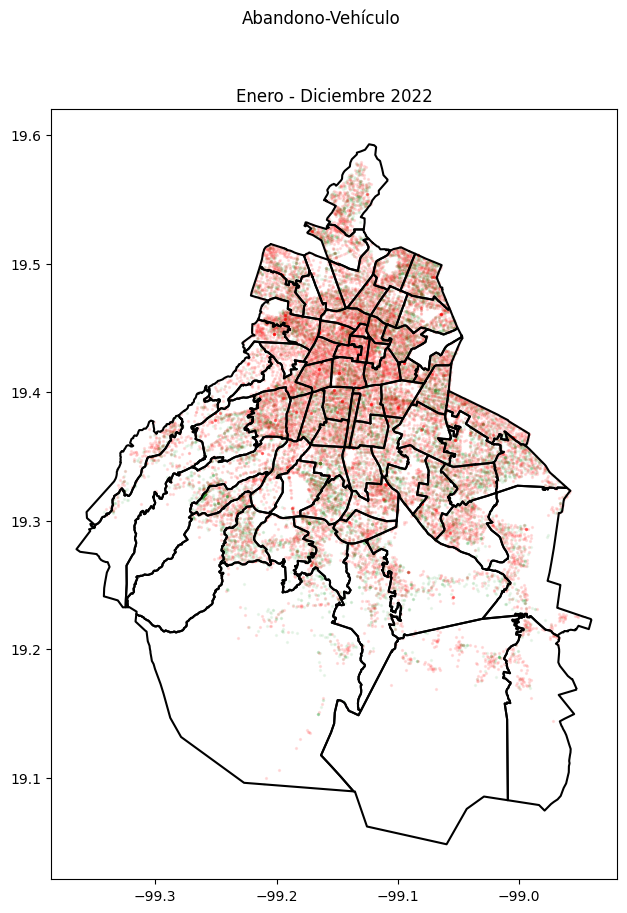

/opt/conda/envs/c5/lib/python3.10/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/opt/conda/envs/c5/lib/python3.10/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


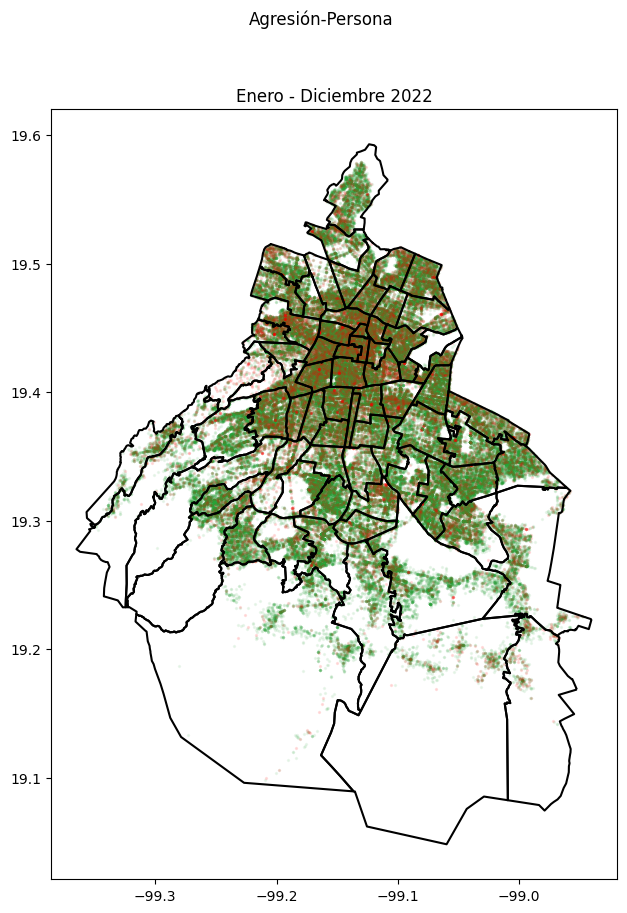

/opt/conda/envs/c5/lib/python3.10/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/opt/conda/envs/c5/lib/python3.10/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


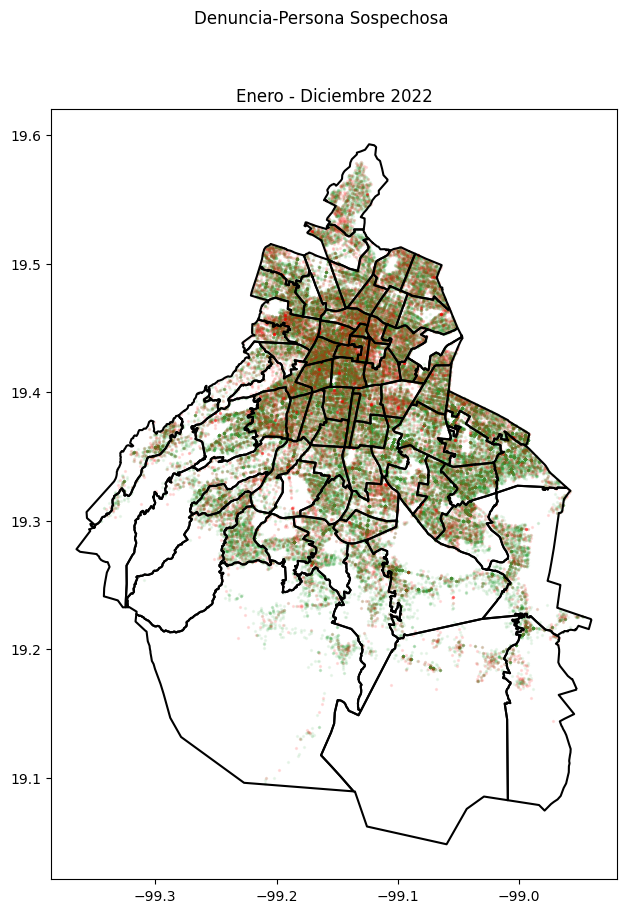

/opt/conda/envs/c5/lib/python3.10/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/opt/conda/envs/c5/lib/python3.10/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


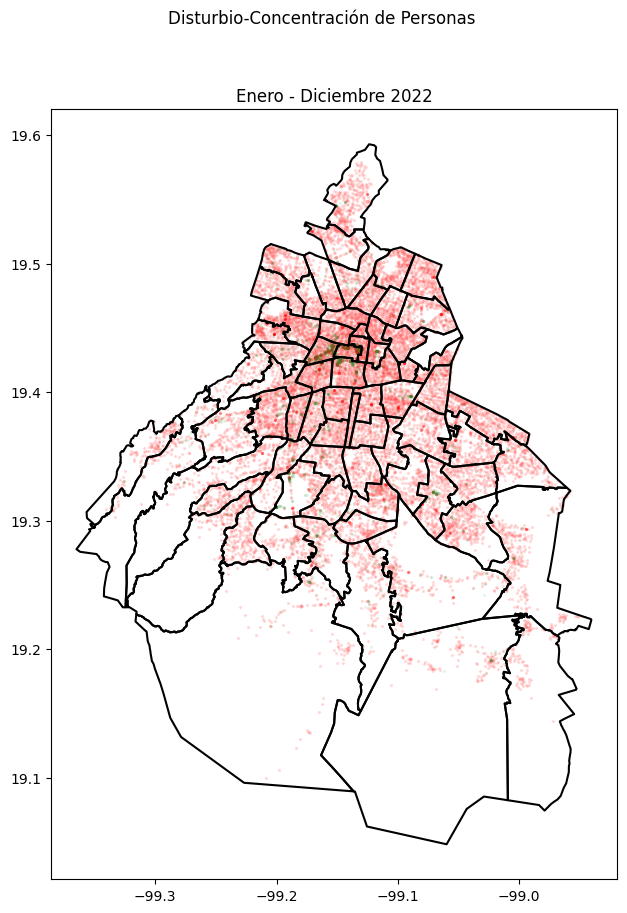

/opt/conda/envs/c5/lib/python3.10/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/opt/conda/envs/c5/lib/python3.10/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


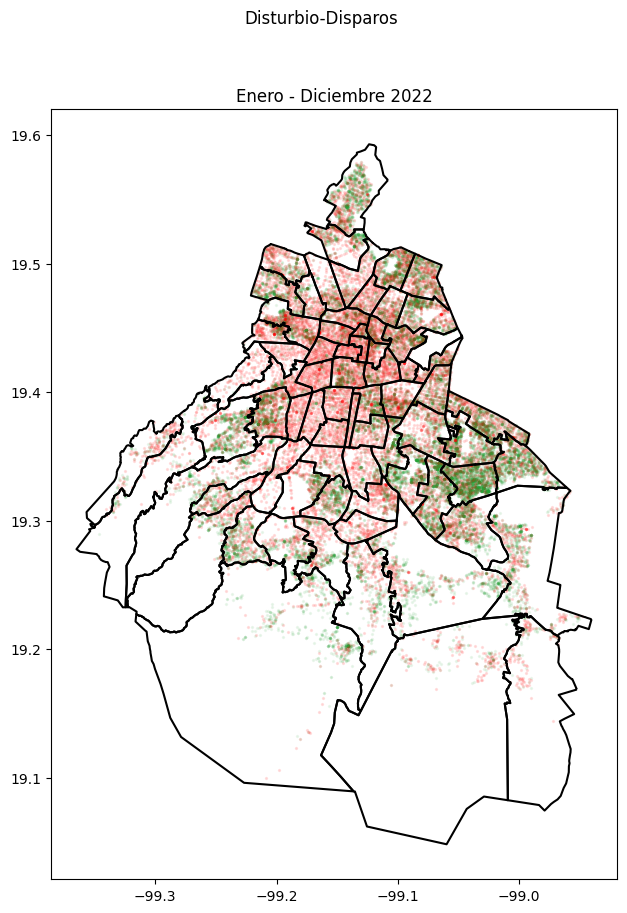

/opt/conda/envs/c5/lib/python3.10/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/opt/conda/envs/c5/lib/python3.10/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


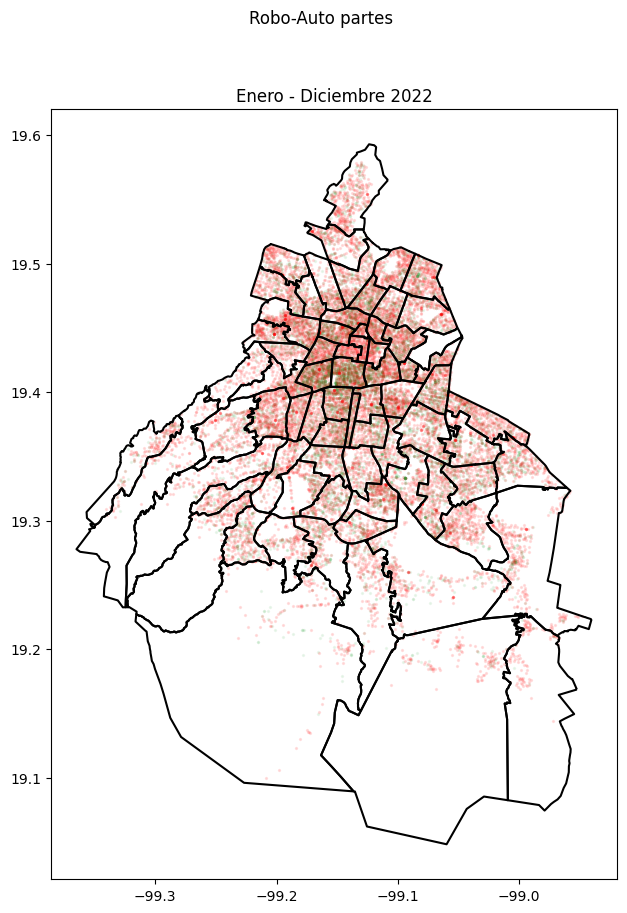

/opt/conda/envs/c5/lib/python3.10/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/opt/conda/envs/c5/lib/python3.10/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


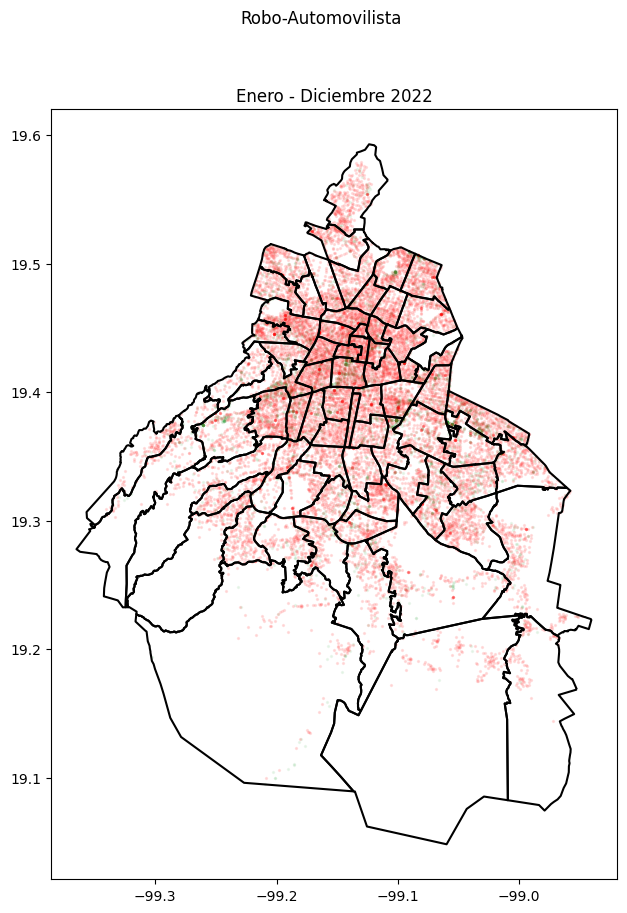

/opt/conda/envs/c5/lib/python3.10/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/opt/conda/envs/c5/lib/python3.10/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


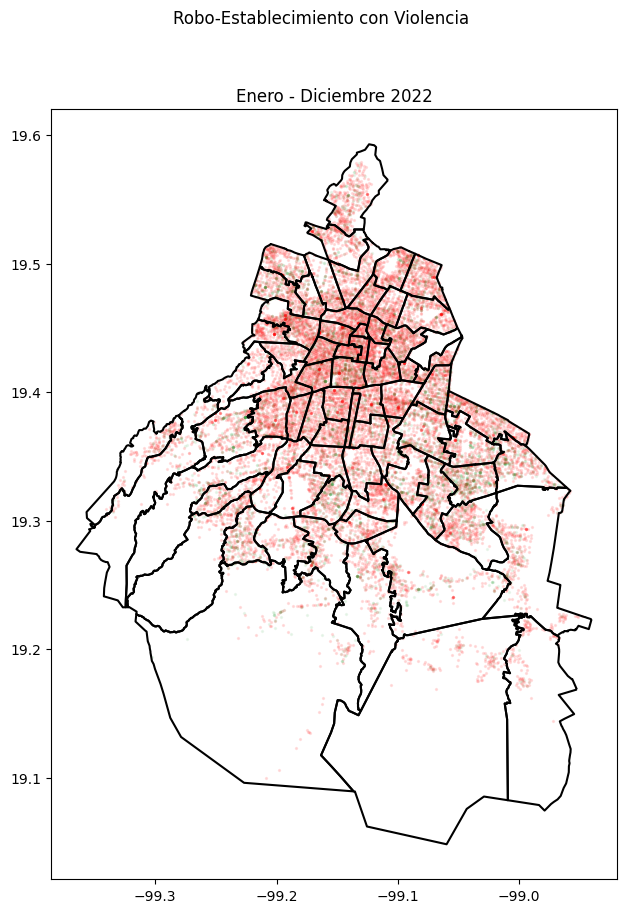

/opt/conda/envs/c5/lib/python3.10/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/opt/conda/envs/c5/lib/python3.10/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


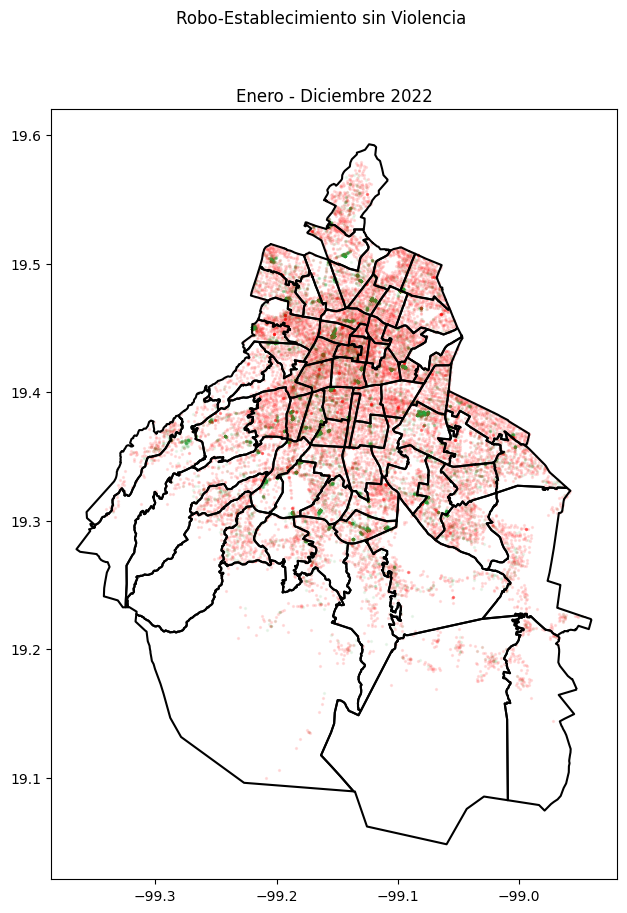

/opt/conda/envs/c5/lib/python3.10/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/opt/conda/envs/c5/lib/python3.10/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


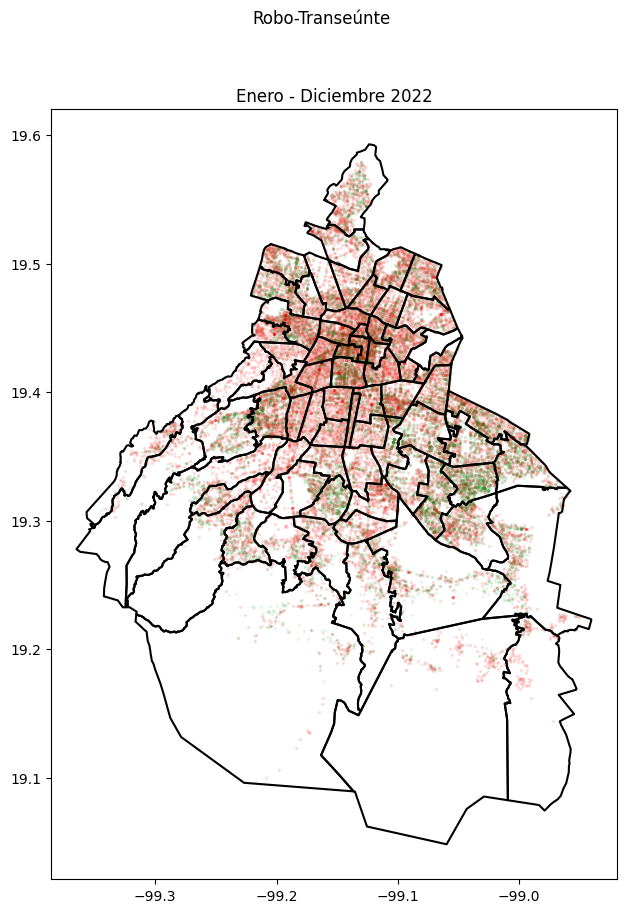

/opt/conda/envs/c5/lib/python3.10/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/opt/conda/envs/c5/lib/python3.10/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


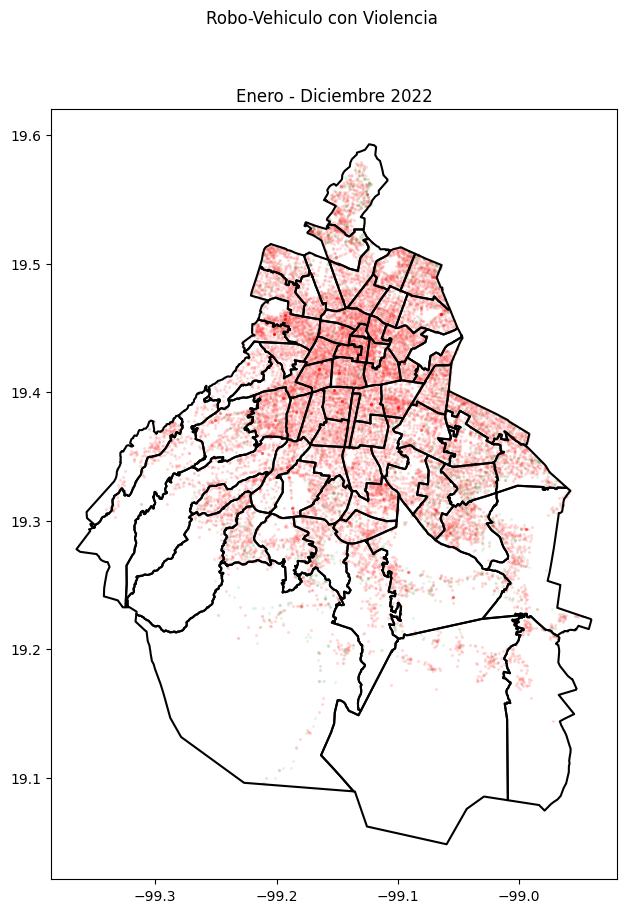

/opt/conda/envs/c5/lib/python3.10/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/opt/conda/envs/c5/lib/python3.10/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


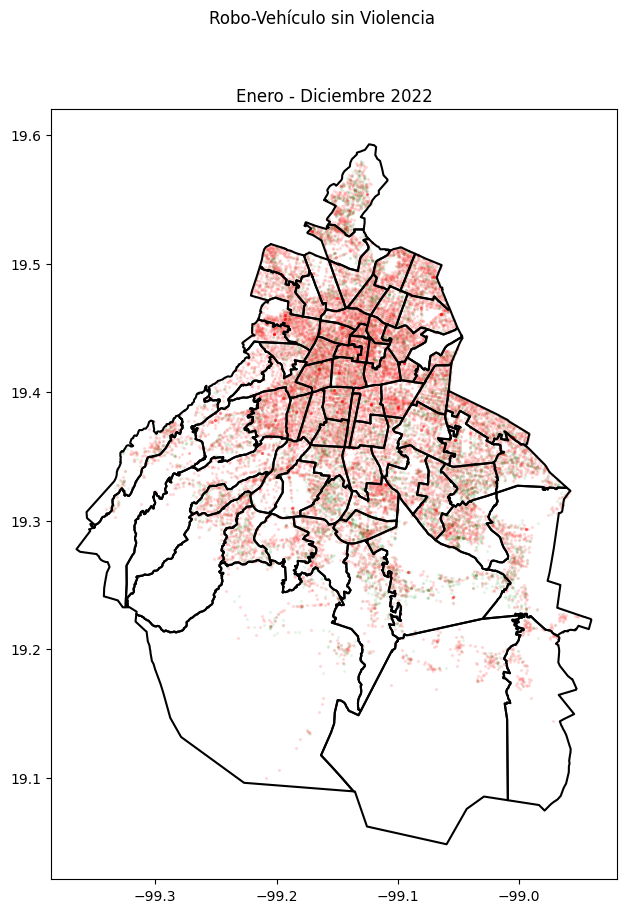

In [37]:
statistic_geomap(
    df, 
    'incidente_c4', 
    'Enero - Diciembre 2022', 
    'geomap_anual', 
    True
)